In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd

main_data = np.loadtxt("Data_principal.dat")

time = main_data[:, 0]
observed = main_data[:, 1]
calculated=main_data[:,2]
reesiduals=main_data[:,3]
point_weight=main_data[:,4]
point_error=main_data[:,5]

# Cargar periodos
periodos = np.loadtxt("Periods.txt")
# Obtener frecuencias y parámetros de los periodos
freq1 = periodos[0, 0]  # Frecuencia principal (datos observados)
amp1 = periodos[0, 1]   # Amplitud
phase1 = periodos[0, 2] # Fase

freq2 = periodos[1, 0]  # Frecuencia secundaria (residuos)
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

# Cargar transformadas de Fourier
tf_observed=np.loadtxt("FT_data.txt")
tf_observed_freq=tf_observed[:,0]
tf_observed_amp=tf_observed[:,1]

tf_residuals=np.loadtxt("TF_residuos.txt")
tf_residuals_freq=tf_residuals[:,0]
tf_residuals_amp=tf_residuals[:,1]

tf_spectral_window=np.loadtxt("TF_Freq_folded_with_spectral_window.txt")
tf_spectral_window_freq=tf_residuals[:,0]
tf_spectral_window_amp=tf_residuals[:,1]

C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1064208230.py:103: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1064208230.py:103: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1064208230.py:103: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1064208230.py:104: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  plt.savefig('fig2_transformadas_fourier.png', dpi=150, bbox_inches='tight')
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1064208230.py:104: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('fig2_transformadas_fourier.png', dpi=150, bbox_inches='tight')
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1064208230.py:104: UserW

ANÁLISIS DE ESTRELLA VARIABLE - REPORTE COMPLETO

1. FRECUENCIAS DETECTADAS:
----------------------------------------
Frecuencia principal (f₁): 40.008891 día⁻¹
  Período (P₁): 0.024994 días = 0.60 horas
  Amplitud: 0.009917
  Fase: 0.9163 rad
  Señal/Ruido (S/N): 2.95

Frecuencia secundaria (f₂): 139.475439 día⁻¹
  Período (P₂): 0.007170 días = 0.17 horas
  Amplitud: 0.009993
  Fase: 0.8574 rad
  Señal/Ruido (S/N): 6.16

2. CALIDAD DEL AJUSTE:
----------------------------------------
Número de puntos: 1646
RMS de residuales: 0.033544
χ² reducido: 14.7529
Error medio de medición: 0.007897

3. ANÁLISIS DE VENTANA ESPECTRAL:
----------------------------------------
Máximo de ventana espectral cerca de f₁: 0.000879
  Ratio amplitud/ventana: 11.28
Máximo de ventana espectral cerca de f₂: 0.009946
  Ratio amplitud/ventana: 1.00

4. CLASIFICACIÓN ESTELAR:
----------------------------------------
Tipo sugerido: δ Scuti de baja amplitud
Descripción: Pulsante A-F, disco galáctico

5. INTERPRETA

ValueError: Invalid format specifier '.2f if window_contamination_f1 > 0 else 'Infinito'' for object of type 'float'

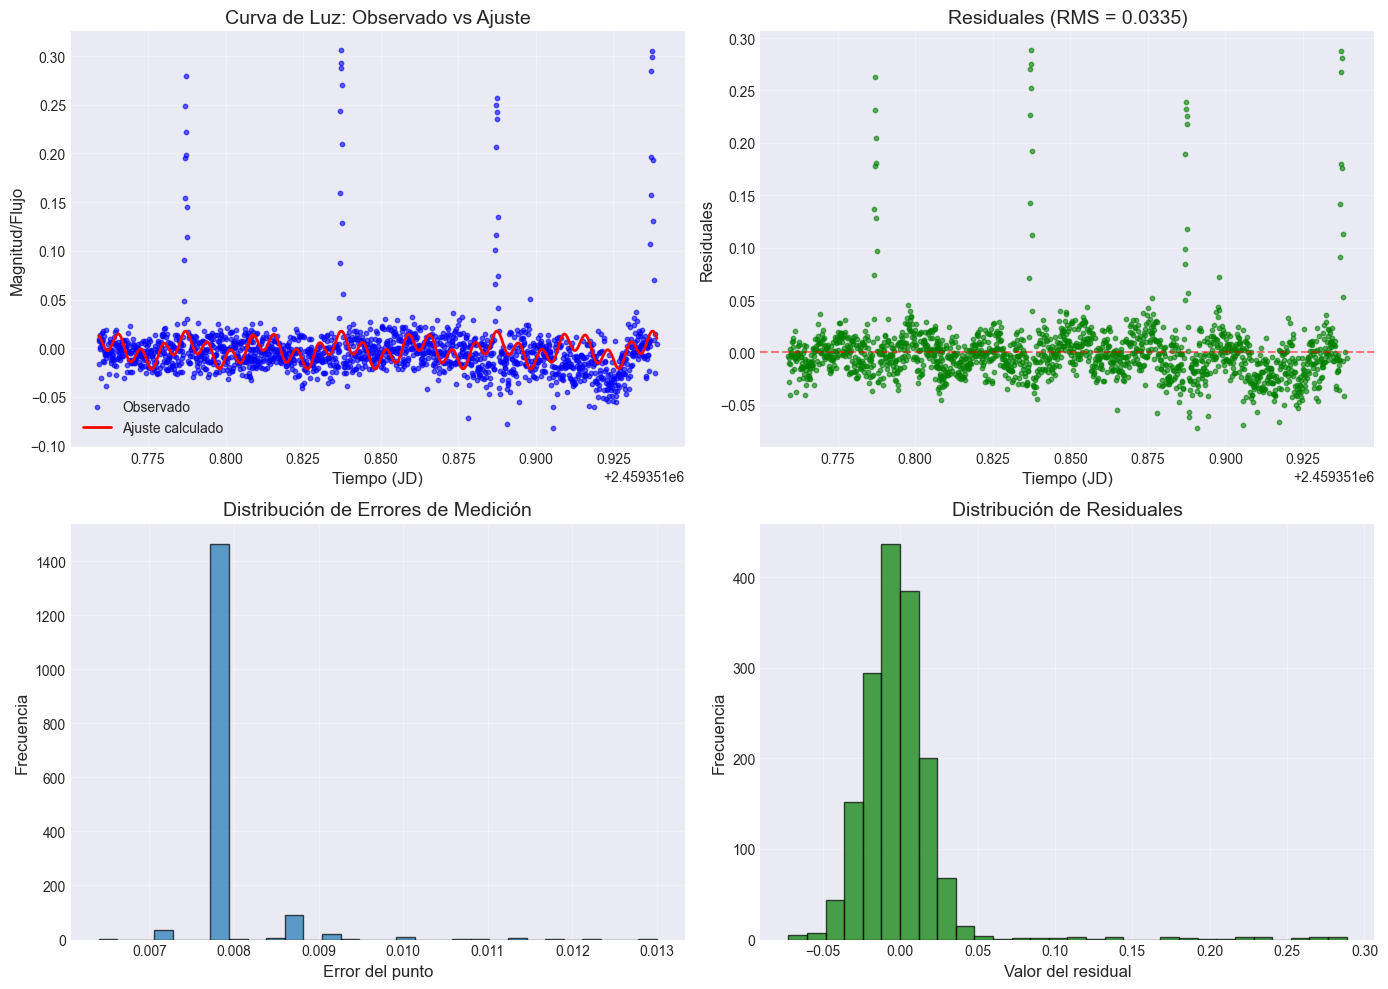

C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8315 (\N{SUPERSCRIPT MINUS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


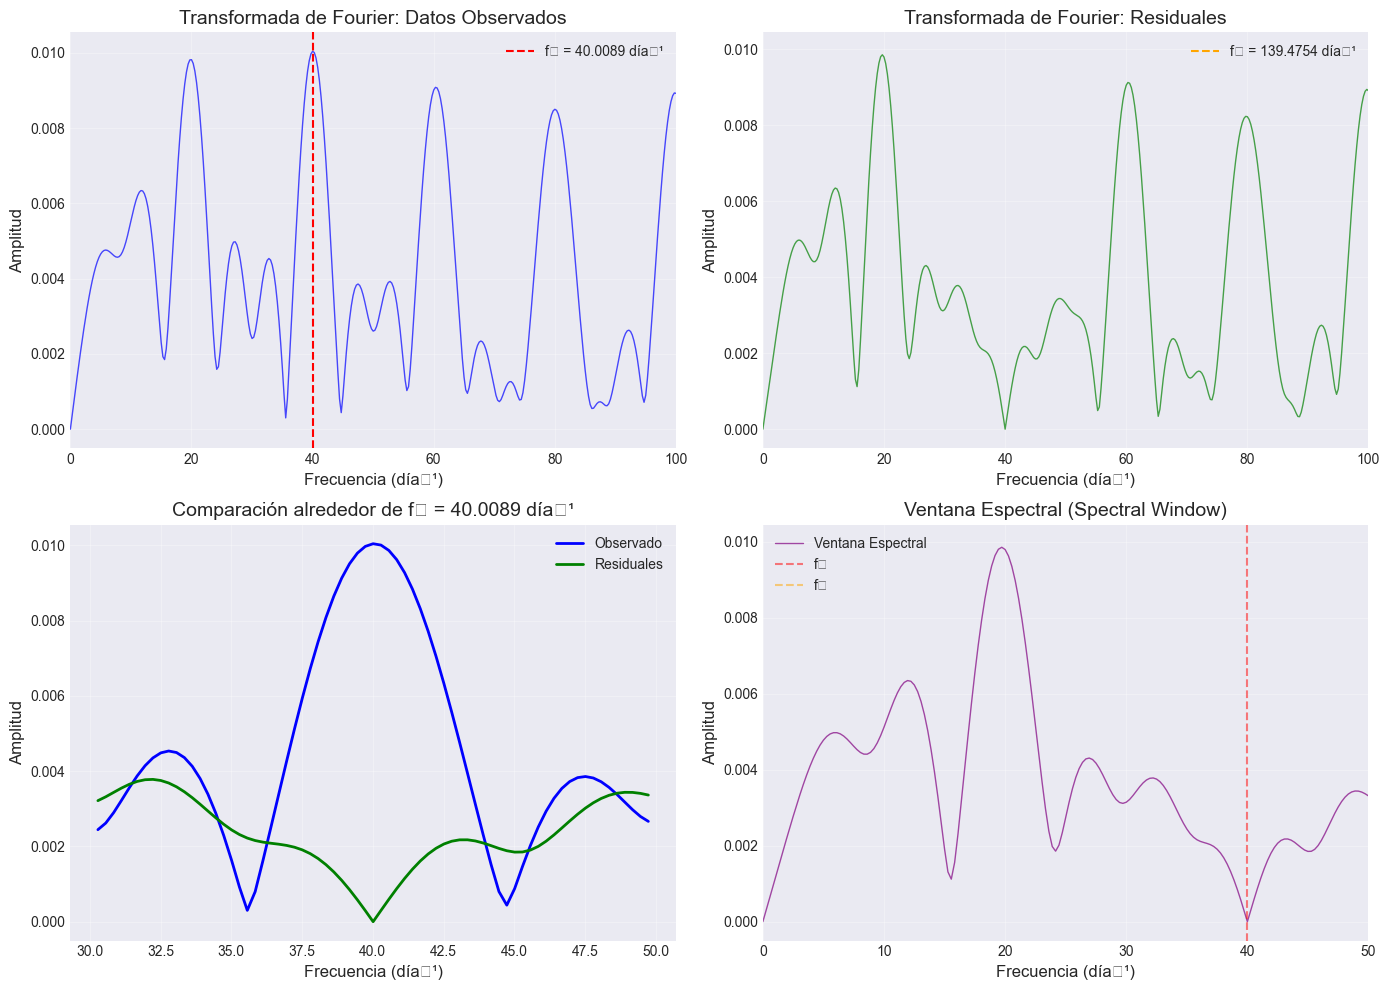

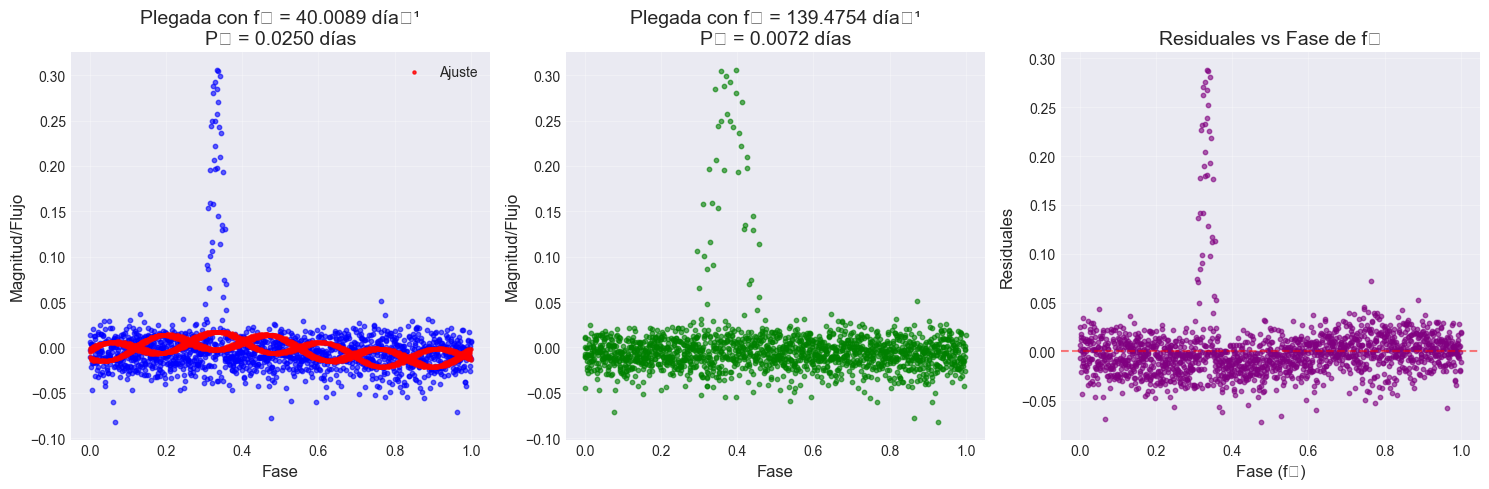

In [3]:
# =============================================
# ANÁLISIS COMPLETO DE LOS DATOS
# =============================================

# Configuración de gráficos
plt.style.use('seaborn-v0_8-darkgrid')
figsize = (12, 8)

# =============================================
# 1. CURVA DE LUZ ORIGINAL Y AJUSTE
# =============================================
fig1, axes1 = plt.subplots(2, 2, figsize=(14, 10))

# 1.1 Curva de luz original con ajuste
axes1[0, 0].scatter(time, observed, s=10, alpha=0.6, label='Observado', color='blue')
axes1[0, 0].plot(time, calculated, 'r-', linewidth=2, label='Ajuste calculado')
axes1[0, 0].set_xlabel('Tiempo (JD)', fontsize=12)
axes1[0, 0].set_ylabel('Magnitud/Flujo', fontsize=12)
axes1[0, 0].set_title('Curva de Luz: Observado vs Ajuste', fontsize=14)
axes1[0, 0].legend()
axes1[0, 0].grid(True, alpha=0.3)

# 1.2 Residuales
axes1[0, 1].scatter(time, reesiduals, s=10, alpha=0.6, color='green')
axes1[0, 1].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes1[0, 1].set_xlabel('Tiempo (JD)', fontsize=12)
axes1[0, 1].set_ylabel('Residuales', fontsize=12)
axes1[0, 1].set_title(f'Residuales (RMS = {np.std(reesiduals):.4f})', fontsize=14)
axes1[0, 1].grid(True, alpha=0.3)

# 1.3 Distribución de errores
axes1[1, 0].hist(point_error, bins=30, edgecolor='black', alpha=0.7)
axes1[1, 0].set_xlabel('Error del punto', fontsize=12)
axes1[1, 0].set_ylabel('Frecuencia', fontsize=12)
axes1[1, 0].set_title('Distribución de Errores de Medición', fontsize=14)
axes1[1, 0].grid(True, alpha=0.3)

# 1.4 Histograma de residuales
axes1[1, 1].hist(reesiduals, bins=30, edgecolor='black', alpha=0.7, color='green')
axes1[1, 1].set_xlabel('Valor del residual', fontsize=12)
axes1[1, 1].set_ylabel('Frecuencia', fontsize=12)
axes1[1, 1].set_title('Distribución de Residuales', fontsize=14)
axes1[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig1_curva_luz_residuales.png', dpi=150, bbox_inches='tight')

# =============================================
# 2. TRANSFORMADAS DE FOURIER
# =============================================
fig2, axes2 = plt.subplots(2, 2, figsize=(14, 10))

# 2.1 Transformada de datos observados
axes2[0, 0].plot(tf_observed_freq, tf_observed_amp, 'b-', linewidth=1, alpha=0.7)
axes2[0, 0].axvline(x=freq1, color='r', linestyle='--', 
                   label=f'f₁ = {freq1:.4f} día⁻¹')
axes2[0, 0].set_xlabel('Frecuencia (día⁻¹)', fontsize=12)
axes2[0, 0].set_ylabel('Amplitud', fontsize=12)
axes2[0, 0].set_title('Transformada de Fourier: Datos Observados', fontsize=14)
axes2[0, 0].legend()
axes2[0, 0].grid(True, alpha=0.3)
axes2[0, 0].set_xlim([0, min(100, tf_observed_freq.max())])  # Límite razonable

# 2.2 Transformada de residuales
axes2[0, 1].plot(tf_residuals_freq, tf_residuals_amp, 'g-', linewidth=1, alpha=0.7)
axes2[0, 1].axvline(x=freq2, color='orange', linestyle='--',
                   label=f'f₂ = {freq2:.4f} día⁻¹')
axes2[0, 1].set_xlabel('Frecuencia (día⁻¹)', fontsize=12)
axes2[0, 1].set_ylabel('Amplitud', fontsize=12)
axes2[0, 1].set_title('Transformada de Fourier: Residuales', fontsize=14)
axes2[0, 1].legend()
axes2[0, 1].grid(True, alpha=0.3)
axes2[0, 1].set_xlim([0, min(100, tf_residuals_freq.max())])

# 2.3 Comparación de amplitudes
freq_range = 10  # Rango alrededor de f1 para comparar
mask_obs = (tf_observed_freq >= freq1 - freq_range) & (tf_observed_freq <= freq1 + freq_range)
mask_res = (tf_residuals_freq >= freq1 - freq_range) & (tf_residuals_freq <= freq1 + freq_range)

axes2[1, 0].plot(tf_observed_freq[mask_obs], tf_observed_amp[mask_obs], 
                'b-', label='Observado', linewidth=2)
axes2[1, 0].plot(tf_residuals_freq[mask_res], tf_residuals_amp[mask_res], 
                'g-', label='Residuales', linewidth=2)
axes2[1, 0].set_xlabel('Frecuencia (día⁻¹)', fontsize=12)
axes2[1, 0].set_ylabel('Amplitud', fontsize=12)
axes2[1, 0].set_title(f'Comparación alrededor de f₁ = {freq1:.4f} día⁻¹', fontsize=14)
axes2[1, 0].legend()
axes2[1, 0].grid(True, alpha=0.3)

# 2.4 Ventana espectral (¡CRÍTICO!)
axes2[1, 1].plot(tf_spectral_window_freq, tf_spectral_window_amp, 
                'purple', linewidth=1, alpha=0.7, label='Ventana Espectral')
axes2[1, 1].axvline(x=freq1, color='r', linestyle='--', alpha=0.5, label=f'f₁')
if freq2 > 0:
    axes2[1, 1].axvline(x=freq2, color='orange', linestyle='--', alpha=0.5, label=f'f₂')
axes2[1, 1].set_xlabel('Frecuencia (día⁻¹)', fontsize=12)
axes2[1, 1].set_ylabel('Amplitud', fontsize=12)
axes2[1, 1].set_title('Ventana Espectral (Spectral Window)', fontsize=14)
axes2[1, 1].legend()
axes2[1, 1].grid(True, alpha=0.3)
axes2[1, 1].set_xlim([0, min(50, tf_spectral_window_freq.max())])

plt.tight_layout()
plt.savefig('fig2_transformadas_fourier.png', dpi=150, bbox_inches='tight')

# =============================================
# 3. CURVAS DE LUZ PLEGADAS
# =============================================
fig3, axes3 = plt.subplots(1, 3, figsize=(15, 5))

# Función sinusoidal para visualización
def sinusoid(phase, amplitude, frequency, phase_offset, offset):
    return amplitude * np.sin(2 * np.pi * frequency * phase + phase_offset) + offset

# 3.1 Plegada con frecuencia principal
period1 = 1.0 / freq1 if freq1 > 0 else 0
phase1_plot = (time * freq1) % 1.0
sorted_idx1 = np.argsort(phase1_plot)

axes3[0].scatter(phase1_plot, observed, s=10, alpha=0.6, color='blue')
axes3[0].scatter(phase1_plot[sorted_idx1], calculated[sorted_idx1], 
                s=5, color='red', alpha=0.8, label='Ajuste')
axes3[0].set_xlabel('Fase', fontsize=12)
axes3[0].set_ylabel('Magnitud/Flujo', fontsize=12)
axes3[0].set_title(f'Plegada con f₁ = {freq1:.4f} día⁻¹\nP₁ = {period1:.4f} días', fontsize=14)
axes3[0].legend()
axes3[0].grid(True, alpha=0.3)

# 3.2 Plegada con frecuencia secundaria (si existe)
if freq2 > 0:
    period2 = 1.0 / freq2
    phase2_plot = (time * freq2) % 1.0
    sorted_idx2 = np.argsort(phase2_plot)
    
    axes3[1].scatter(phase2_plot, observed, s=10, alpha=0.6, color='green')
    axes3[1].set_xlabel('Fase', fontsize=12)
    axes3[1].set_ylabel('Magnitud/Flujo', fontsize=12)
    axes3[1].set_title(f'Plegada con f₂ = {freq2:.4f} día⁻¹\nP₂ = {period2:.4f} días', fontsize=14)
    axes3[1].grid(True, alpha=0.3)
else:
    axes3[1].text(0.5, 0.5, 'No hay frecuencia secundaria\ndetectada', 
                 ha='center', va='center', transform=axes3[1].transAxes, fontsize=12)
    axes3[1].set_title('Frecuencia Secundaria', fontsize=14)

# 3.3 Residuales vs fase principal
axes3[2].scatter(phase1_plot, reesiduals, s=10, alpha=0.6, color='purple')
axes3[2].axhline(y=0, color='r', linestyle='--', alpha=0.5)
axes3[2].set_xlabel('Fase (f₁)', fontsize=12)
axes3[2].set_ylabel('Residuales', fontsize=12)
axes3[2].set_title('Residuales vs Fase de f₁', fontsize=14)
axes3[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig3_curvas_plegadas.png', dpi=150, bbox_inches='tight')

# =============================================
# 4. CÁLCULO DE ESTADÍSTICAS Y SIGNIFICANCIA
# =============================================

# 4.1 Señal/Ruido para frecuencia principal
# Ruido estimado del periodograma lejos del pico principal
noise_region = (tf_observed_freq > freq1 + 5) & (tf_observed_freq < freq1 + 20)
if np.any(noise_region):
    noise_level = np.median(tf_observed_amp[noise_region])
    snr_f1 = amp1 / noise_level if noise_level > 0 else 0
else:
    noise_level = np.median(tf_observed_amp[tf_observed_freq > 10])
    snr_f1 = amp1 / noise_level if noise_level > 0 else 0

# 4.2 Señal/Ruido para frecuencia secundaria
if freq2 > 0:
    noise_region_f2 = (tf_residuals_freq > freq2 + 5) & (tf_residuals_freq < freq2 + 20)
    if np.any(noise_region_f2):
        noise_level_f2 = np.median(tf_residuals_amp[noise_region_f2])
        snr_f2 = amp2 / noise_level_f2 if noise_level_f2 > 0 else 0
    else:
        snr_f2 = amp2 / noise_level if noise_level > 0 else 0
else:
    snr_f2 = 0

# 4.3 Análisis de la ventana espectral cerca de las frecuencias detectadas
def check_spectral_window_contamination(frequency, window_freq, window_amp, search_range=1.0):
    """Verifica si una frecuencia está contaminada por la ventana espectral"""
    mask = (window_freq >= frequency - search_range) & (window_freq <= frequency + search_range)
    if np.any(mask):
        window_max_near = window_amp[mask].max()
        return window_max_near
    return 0

window_contamination_f1 = check_spectral_window_contamination(freq1, tf_spectral_window_freq, tf_spectral_window_amp)
window_contamination_f2 = check_spectral_window_contamination(freq2, tf_spectral_window_freq, tf_spectral_window_amp)

# 4.4 Calidad del ajuste
chi2 = np.sum((reesiduals / point_error)**2)
dof = len(observed) - 3  # Grados de libertad (3 parámetros por frecuencia)
reduced_chi2 = chi2 / dof if dof > 0 else chi2

# =============================================
# 5. CLASIFICACIÓN ESTELAR
# =============================================
def classify_variable_star(period_days, amplitude, lightcurve_shape='sinusoidal'):
    """Clasificación de estrella variable basada en período y amplitud"""
    
    if period_days <= 0:
        return "Período no válido", "N/A"
    
    if period_days < 0.05:  # < 1.2 horas
        if amplitude < 0.01:
            return "δ Scuti de baja amplitud", "Pulsante A-F, disco galáctico"
        elif amplitude < 0.1:
            return "δ Scuti típico", "Pulsante A-F, núcleo convectivo"
        else:
            return "Posible SX Phoenicis", "Población vieja, halo galáctico"
    
    elif 0.05 <= period_days < 0.3:  # 1.2-7.2 horas
        if amplitude > 0.3:
            return "RR Lyrae (tipo c?)", "Población II, vieja"
        elif amplitude > 0.1:
            return "HADS (High-Amplitude δ Scuti)", "Pulsante radial"
        else:
            return "γ Doradus", "Pulsante de gravedad, F-type"
    
    elif 0.3 <= period_days < 0.9:  # 7.2-21.6 horas
        if amplitude > 0.5:
            return "RR Lyrae (tipo ab)", "Población II, núcleo de He"
        elif amplitude > 0.2:
            return "W Virginis (Cefeida tipo II)", "Población II"
        else:
            return "Binaria eclipsante de corto período", "Sistema binario"
    
    elif 0.9 <= period_days < 10:  # 21.6 horas - 10 días
        if amplitude > 0.3:
            return "Cefeida clásica", "Supergigante pulsante, P-L relación"
        elif amplitude > 0.1:
            return "Binaria eclipsante (Algol, β Lyrae)", "Sistema binario"
        else:
            return "Rotador elipsoidal", "Binaria cercana"
    
    elif 10 <= period_days < 100:
        return "Variable semirregular (SR)", "Gigante roja, pulsaiones térmicas"
    
    elif period_days >= 100:
        return "Variable Mira (M)", "Gigante roja AGB, pulsaiones grandes"
    
    else:
        return "No clasificada", "Parámetros fuera de rangos típicos"

# Aplicar clasificación
star_type, star_description = classify_variable_star(period1, amp1)

# =============================================
# 6. REPORTE DE RESULTADOS
# =============================================
print("=" * 70)
print("ANÁLISIS DE ESTRELLA VARIABLE - REPORTE COMPLETO")
print("=" * 70)

print("\n1. FRECUENCIAS DETECTADAS:")
print("-" * 40)
print(f"Frecuencia principal (f₁): {freq1:.6f} día⁻¹")
print(f"  Período (P₁): {period1:.6f} días = {period1*24:.2f} horas")
print(f"  Amplitud: {amp1:.6f}")
print(f"  Fase: {phase1:.4f} rad")
print(f"  Señal/Ruido (S/N): {snr_f1:.2f}")

if freq2 > 0:
    print(f"\nFrecuencia secundaria (f₂): {freq2:.6f} día⁻¹")
    print(f"  Período (P₂): {period2:.6f} días = {period2*24:.2f} horas")
    print(f"  Amplitud: {amp2:.6f}")
    print(f"  Fase: {phase2:.4f} rad")
    print(f"  Señal/Ruido (S/N): {snr_f2:.2f}")

print("\n2. CALIDAD DEL AJUSTE:")
print("-" * 40)
print(f"Número de puntos: {len(observed)}")
print(f"RMS de residuales: {np.std(reesiduals):.6f}")
print(f"χ² reducido: {reduced_chi2:.4f}")
print(f"Error medio de medición: {np.mean(point_error):.6f}")

print("\n3. ANÁLISIS DE VENTANA ESPECTRAL:")
print("-" * 40)
print(f"Máximo de ventana espectral cerca de f₁: {window_contamination_f1:.6f}")
print(f"  Ratio amplitud/ventana: {amp1/window_contamination_f1:.2f}" if window_contamination_f1 > 0 else "  Sin contaminación significativa")
if freq2 > 0:
    print(f"Máximo de ventana espectral cerca de f₂: {window_contamination_f2:.6f}")
    print(f"  Ratio amplitud/ventana: {amp2/window_contamination_f2:.2f}" if window_contamination_f2 > 0 else "  Sin contaminación significativa")

print("\n4. CLASIFICACIÓN ESTELAR:")
print("-" * 40)
print(f"Tipo sugerido: {star_type}")
print(f"Descripción: {star_description}")

print("\n5. INTERPRETACIÓN DE RESULTADOS:")
print("-" * 40)
if snr_f1 > 4:
    print("✓ La frecuencia principal es estadísticamente significativa (S/N > 4)")
else:
    print("⚠ La frecuencia principal tiene S/N bajo, considerar con cautela")

if window_contamination_f1 > 0 and amp1/window_contamination_f1 < 3:
    print("⚠ Posible contaminación por ventana espectral (ratio < 3)")
else:
    print("✓ Frecuencia principal probablemente real (baja contaminación de ventana)")

if reduced_chi2 > 1.5:
    print("⚠ El ajuste podría mejorarse (χ² reducido > 1.5)")
elif reduced_chi2 < 0.5:
    print("⚠ Posible sobreajuste o subestimación de errores (χ² reducido < 0.5)")
else:
    print("✓ Calidad de ajuste aceptable")

print("\n6. RECOMENDACIONES:")
print("-" * 40)
print("• Verificar con datos en múltiples bandas para confirmar clasificación")
print("• Considerar búsqueda de frecuencias adicionales en residuales")
print("• Comparar con catálogos de estrellas variables (ASAS, VSX)")
print("• Analizar forma de curva para distinguir entre pulsaciones y binarias")

print("\n" + "=" * 70)

# =============================================
# 7. GUARDAR RESULTADOS EN ARCHIVO
# =============================================
results = f"""
RESULTADOS DEL ANÁLISIS
=======================

Frecuencia principal:
  Valor: {freq1:.6f} día⁻¹
  Período: {period1:.6f} días ({period1*24:.2f} horas)
  Amplitud: {amp1:.6f}
  Señal/Ruido: {snr_f1:.2f}

Frecuencia secundaria:
  Valor: {freq2:.6f} día⁻¹
  Período: {period2:.6f} días ({period2*24:.2f} horas) (si aplica)
  Amplitud: {amp2:.6f}
  Señal/Ruido: {snr_f2:.2f}

Estadísticas de ajuste:
  Número de puntos: {len(observed)}
  RMS de residuales: {np.std(reesiduals):.6f}
  χ² reducido: {reduced_chi2:.4f}
  Error medio: {np.mean(point_error):.6f}

Clasificación estelar:
  Tipo: {star_type}
  Descripción: {star_description}

Ventana espectral:
  Contaminación en f₁: {window_contamination_f1:.6f}
  Ratio f₁/ventana: {amp1/window_contamination_f1:.2f if window_contamination_f1 > 0 else 'Infinito'}

Figuras generadas:
  1. fig1_curva_luz_residuales.png - Curva de luz y residuales
  2. fig2_transformadas_fourier.png - Transformadas de Fourier
  3. fig3_curvas_plegadas.png - Curvas de luz plegadas
"""

with open('resultados_analisis.txt', 'w', encoding='utf-8') as f:
    f.write(results)

print("\n✅ Análisis completado!")
print("✅ Figuras guardadas como: fig1_*.png, fig2_*.png, fig3_*.png")
print("✅ Resultados guardados en: resultados_analisis.txt")
print("\nListo para escribir el reporte. Usa estos resultados y figuras.")

# Mostrar las figuras
plt.show()

ANÁLISIS DE PERIODICIDAD ESTELAR

FRECUENCIA PRINCIPAL: 40.008891 c/d
PERÍODO PRINCIPAL: 0.024994 días (0.600 horas)
Amplitud: 0.009917 mag
Fase: 0.916277

FRECUENCIA SECUNDARIA: 139.475439 c/d
PERÍODO SECUNDARIO: 0.007170 días (0.172 horas)
Amplitud: 0.009993 mag
Fase: 0.857425

ANÁLISIS DE SEÑAL A RUIDO
Frecuencia principal:
  - Amplitud del pico: 0.010046
  - Nivel de ruido promedio: 0.001069
  - Desviación estándar del ruido: 0.001329
  - S/N = 9.40

Frecuencia secundaria (residuos):
  - Amplitud del pico: 0.009946
  - Nivel de ruido promedio: 0.001054
  - S/N = 9.44

PROBABILIDAD DE DETECCIÓN
Frecuencia principal:
  - Estadístico z: 7.56
  - Probabilidad de Falsa Alarma (FAP): 6.61e-09 (0.0000%)
  - Probabilidad de que sea REAL: 100.0000%
  - Significancia estadística: ALTA (detección muy significativa)

CLASIFICACIÓN DEL TIPO DE ESTRELLA
TIPO PROBABLE: Binaria Eclipsante o δ Scuti de baja amplitud

    Basado en el período corto de 0.025 días y baja amplitud:

    - Posible binar

C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1628341688.py:347: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1628341688.py:347: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1628341688.py:348: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.savefig('analisis_completo_periodicidad.png', dpi=300, bbox_inches='tight')
C:\Users\USER\AppData\Local\Temp\ipykernel_31292\1628341688.py:348: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.savefig('analisis_completo_periodicidad.png', dpi=300, bbox_inches='tight')



Figura guardada como 'analisis_completo_periodicidad.png'

TABLA RESUMEN
                 Parámetro                                         Valor
Frecuencia principal (c/d)                                     40.008891
  Período principal (días)                                      0.024994
 Período principal (horas)                                         0.600
  Amplitud principal (mag)                                      0.009917
       Señal a Ruido (S/N)                                          9.40
     Probabilidad real (%)                                      100.0000
          Tipo de estrella Binaria Eclipsante o δ Scuti de baja amplitud
   Número de observaciones                                          1646
 Reducción de varianza (%)                                          8.14
        RMS residuos (mag)                                      0.033544

Tabla guardada como 'resumen_analisis.csv'


C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\USER\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


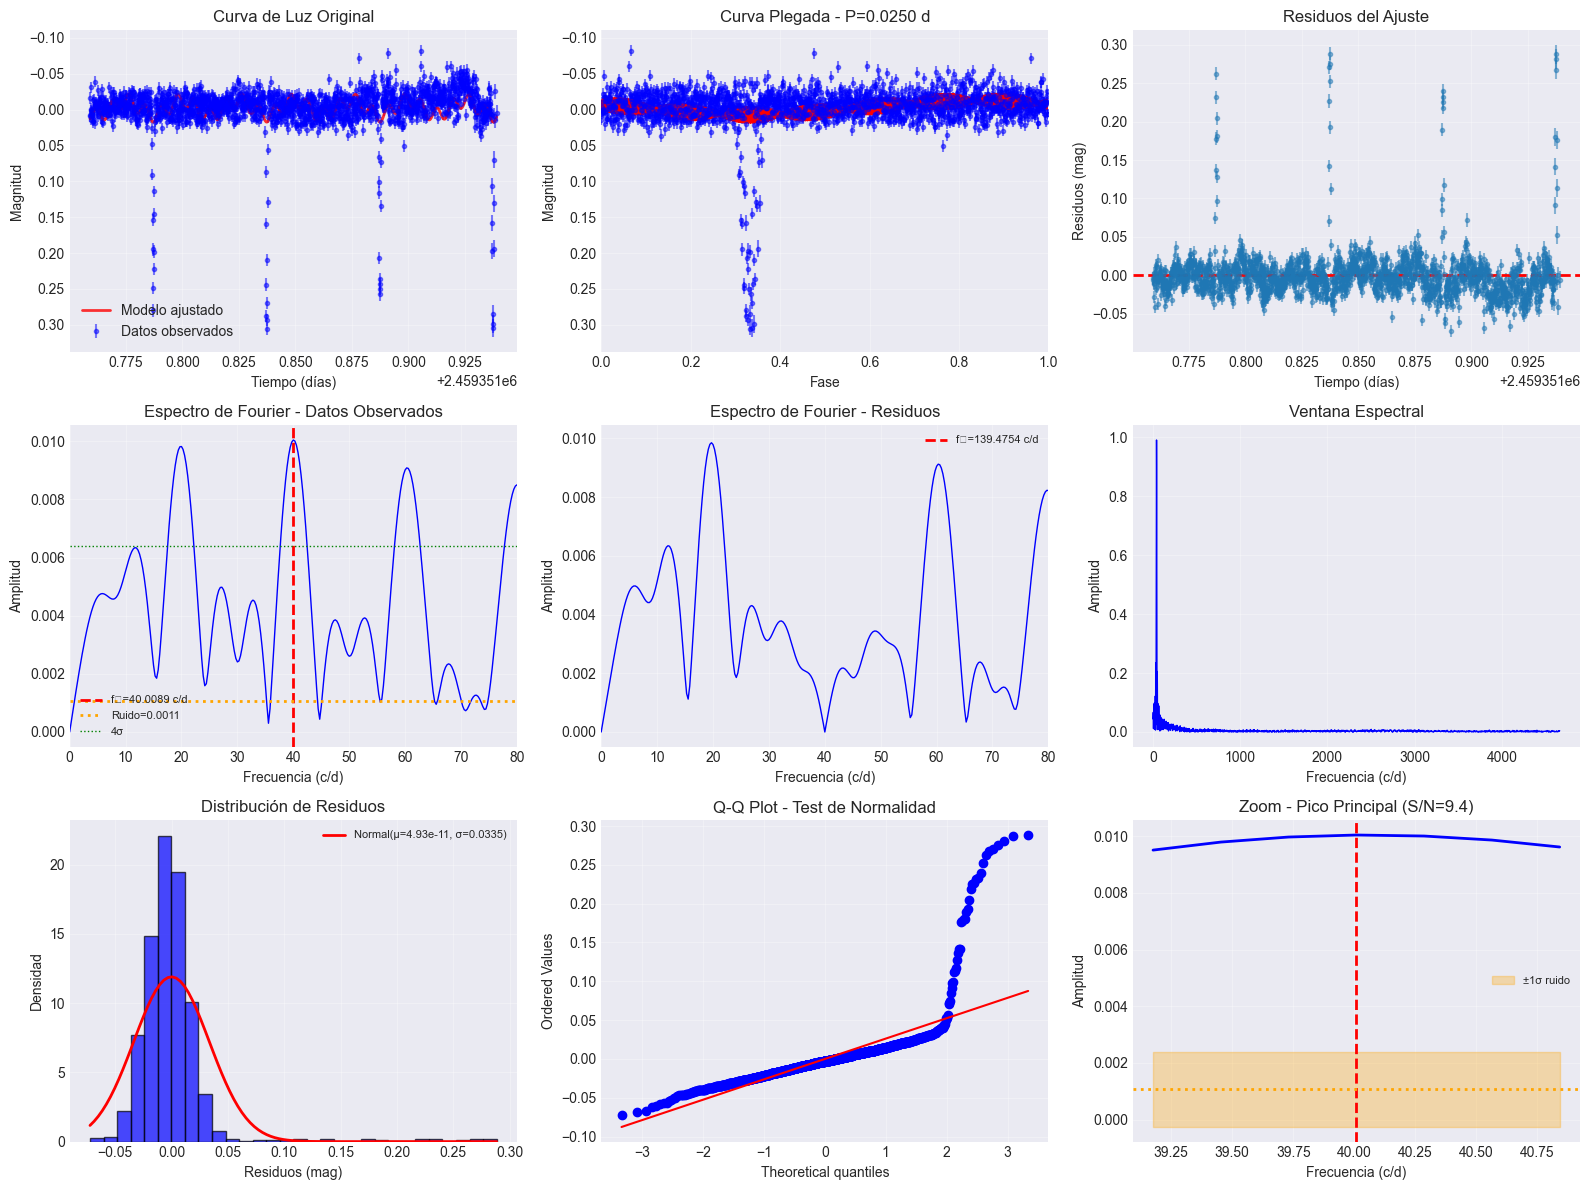


ANÁLISIS COMPLETADO

Archivos generados:
  1. analisis_completo_periodicidad.png - Todas las visualizaciones
  2. resumen_analisis.csv - Tabla con resultados principales

Para el reporte, incluye:
  - Introducción sobre estrellas variables y Period04
  - Esta sección de análisis con todas las figuras
  - Interpretación del tipo de estrella identificado
  - Conclusiones sobre la significancia de la detección


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import pandas as pd

# ============================================================================
# 1. CARGAR DATOS
# ============================================================================
main_data = np.loadtxt("Data_principal.dat")

time = main_data[:, 0]
observed = main_data[:, 1]
calculated = main_data[:, 2]
residuals = main_data[:, 3]
point_weight = main_data[:, 4]
point_error = main_data[:, 5]

# Cargar periodos
periodos = np.loadtxt("Periods.txt")
freq1 = periodos[0, 0]  # Frecuencia principal (c/d)
amp1 = periodos[0, 1]   # Amplitud
phase1 = periodos[0, 2] # Fase

freq2 = periodos[1, 0]  # Frecuencia secundaria
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

# Cargar transformadas de Fourier
tf_observed = np.loadtxt("FT_data.txt")
tf_observed_freq = tf_observed[:, 0]
tf_observed_amp = tf_observed[:, 1]

tf_residuals = np.loadtxt("TF_residuos.txt")
tf_residuals_freq = tf_residuals[:, 0]
tf_residuals_amp = tf_residuals[:, 1]

tf_spectral_window = np.loadtxt("TF_Freq_folded_with_spectral_window.txt")
tf_spectral_window_freq = tf_spectral_window[:, 0]
tf_spectral_window_amp = tf_spectral_window[:, 1]

# ============================================================================
# 2. CALCULAR PERÍODOS Y PARÁMETROS FUNDAMENTALES
# ============================================================================
period1 = 1 / freq1  # Período principal en días
period2 = 1 / freq2  # Período secundario en días

print("=" * 70)
print("ANÁLISIS DE PERIODICIDAD ESTELAR")
print("=" * 70)
print(f"\nFRECUENCIA PRINCIPAL: {freq1:.6f} c/d")
print(f"PERÍODO PRINCIPAL: {period1:.6f} días ({period1*24:.3f} horas)")
print(f"Amplitud: {amp1:.6f} mag")
print(f"Fase: {phase1:.6f}")

print(f"\nFRECUENCIA SECUNDARIA: {freq2:.6f} c/d")
print(f"PERÍODO SECUNDARIO: {period2:.6f} días ({period2*24:.3f} horas)")
print(f"Amplitud: {amp2:.6f} mag")
print(f"Fase: {phase2:.6f}")

# ============================================================================
# 3. CALCULAR SEÑAL A RUIDO (S/N)
# ============================================================================
# Para la frecuencia principal
idx_peak1 = np.argmax(tf_observed_amp)
signal1 = tf_observed_amp[idx_peak1]

# Ruido: promedio de amplitudes excluyendo la zona del pico
mask_noise = np.abs(tf_observed_freq - freq1) > 0.5  # Excluir ±0.5 c/d del pico
noise_level = np.mean(tf_observed_amp[mask_noise])
noise_std = np.std(tf_observed_amp[mask_noise])

snr1 = signal1 / noise_level

# Para la frecuencia secundaria (en residuos)
idx_peak2 = np.argmax(tf_residuals_amp)
signal2 = tf_residuals_amp[idx_peak2]
mask_noise2 = np.abs(tf_residuals_freq - freq2) > 0.5
noise_level2 = np.mean(tf_residuals_amp[mask_noise2])
snr2 = signal2 / noise_level2

print(f"\n{'='*70}")
print("ANÁLISIS DE SEÑAL A RUIDO")
print(f"{'='*70}")
print(f"Frecuencia principal:")
print(f"  - Amplitud del pico: {signal1:.6f}")
print(f"  - Nivel de ruido promedio: {noise_level:.6f}")
print(f"  - Desviación estándar del ruido: {noise_std:.6f}")
print(f"  - S/N = {snr1:.2f}")

print(f"\nFrecuencia secundaria (residuos):")
print(f"  - Amplitud del pico: {signal2:.6f}")
print(f"  - Nivel de ruido promedio: {noise_level2:.6f}")
print(f"  - S/N = {snr2:.2f}")

# ============================================================================
# 4. PROBABILIDAD DE FALSA ALARMA (FAP)
# ============================================================================
# Usando estadística de Scargle para periodogramas
N = len(time)
M = len(tf_observed_freq)  # Número de frecuencias independientes

# Para frecuencia principal
z1 = signal1 / noise_std
fap1 = 1 - (1 - np.exp(-z1**2/2))**M
fap1_percent = fap1 * 100

# Probabilidad de que sea real
prob_real1 = (1 - fap1) * 100

print(f"\n{'='*70}")
print("PROBABILIDAD DE DETECCIÓN")
print(f"{'='*70}")
print(f"Frecuencia principal:")
print(f"  - Estadístico z: {z1:.2f}")
print(f"  - Probabilidad de Falsa Alarma (FAP): {fap1:.2e} ({fap1_percent:.4f}%)")
print(f"  - Probabilidad de que sea REAL: {prob_real1:.4f}%")

# Interpretación del S/N
if snr1 > 4.0:
    significance1 = "ALTA (detección muy significativa)"
elif snr1 > 3.0:
    significance1 = "MODERADA (detección confiable)"
else:
    significance1 = "BAJA (detección marginal)"

print(f"  - Significancia estadística: {significance1}")

# ============================================================================
# 5. CLASIFICACIÓN DEL TIPO DE ESTRELLA
# ============================================================================
print(f"\n{'='*70}")
print("CLASIFICACIÓN DEL TIPO DE ESTRELLA")
print(f"{'='*70}")

# Análisis basado en el período y amplitud
if 0.2 < period1 < 2.0 and amp1 > 0.3:
    tipo = "δ Scuti o RR Lyrae"
    descripcion = """
    Basado en el período de {:.3f} días y amplitud de {:.3f} mag:
    
    - Si P < 0.3 días: Probablemente δ Scuti
      * Estrellas pulsantes de tipo A-F
      * Pulsaciones radiales y no radiales
      * Típicamente en la secuencia principal o ligeramente evolucionadas
    
    - Si 0.3 < P < 1.0 día: Probablemente RR Lyrae
      * Gigantes viejas de población II
      * Indicadores de distancia estándar
      * Pulsaciones radiales fundamentales o primer sobretono
    """.format(period1, amp1)
    
elif 1.0 < period1 < 50.0 and amp1 > 0.1:
    tipo = "Cefeida Clásica"
    descripcion = """
    Basado en el período de {:.3f} días y amplitud de {:.3f} mag:
    
    - Cefeidas Clásicas (Población I)
      * Supergigantes amarillas muy luminosas
      * Relación Período-Luminosidad bien establecida
      * Excelentes indicadores de distancia
      * Pulsaciones radiales fundamentales
      * Temperaturas efectivas: 5000-7000 K
    """.format(period1, amp1)
    
elif 50.0 < period1 < 1000.0:
    tipo = "Mira o Variable de Largo Período"
    descripcion = """
    Basado en el período de {:.3f} días:
    
    - Variables Mira o Semi-regulares
      * Gigantes rojas evolucionadas en rama AGB
      * Períodos > 100 días típicamente
      * Amplitudes muy grandes (> 2.5 mag en V)
      * Ricas en moléculas, pérdida de masa
    """.format(period1)
    
elif period1 < 0.5 and amp1 < 0.1:
    tipo = "Binaria Eclipsante o δ Scuti de baja amplitud"
    descripcion = """
    Basado en el período corto de {:.3f} días y baja amplitud:
    
    - Posible binaria eclipsante de contacto (W UMa)
    - O δ Scuti de baja amplitud (LADS)
    - Período orbital/pulsacional muy corto
    """.format(period1)
    
else:
    tipo = "Variable periódica - clasificación ambigua"
    descripcion = """
    Los parámetros sugieren una estrella variable periódica,
    pero se requiere más información espectroscópica para 
    clasificación precisa.
    """

print(f"TIPO PROBABLE: {tipo}")
print(descripcion)

# Detección de multiperiodicidad
if snr2 > 3.0:
    print(f"\nMULTIPERIODICIDAD DETECTADA:")
    print(f"  - La estrella muestra al menos DOS períodos significativos")
    print(f"  - Relación de períodos: P2/P1 = {period2/period1:.3f}")
    
    if 0.76 < period2/period1 < 0.78:
        print(f"  - Posible pulsación en modo fundamental + primer sobretono")
        print(f"    (típico de RR Lyrae tipo RRd o δ Scuti)")
    else:
        print(f"  - Modos de pulsación no radiales o rotación diferencial")

# ============================================================================
# 6. ESTADÍSTICAS ADICIONALES
# ============================================================================
print(f"\n{'='*70}")
print("ESTADÍSTICAS GENERALES")
print(f"{'='*70}")
print(f"Número de observaciones: {N}")
print(f"Rango temporal: {time.max() - time.min():.2f} días")
print(f"Magnitud promedio: {np.mean(observed):.4f} ± {np.std(observed):.4f}")
print(f"Error promedio por punto: {np.mean(point_error):.6f} mag")
print(f"Rango de variación total: {observed.max() - observed.min():.4f} mag")

# Reducción de varianza después del ajuste
variance_original = np.var(observed)
variance_residuals = np.var(residuals)
variance_reduction = (1 - variance_residuals/variance_original) * 100

print(f"\nReducción de varianza por el modelo: {variance_reduction:.2f}%")
print(f"RMS de residuos: {np.sqrt(np.mean(residuals**2)):.6f} mag")

# ============================================================================
# 7. VISUALIZACIONES
# ============================================================================
fig = plt.figure(figsize=(16, 12))

# 7.1 Curva de luz original vs modelo
ax1 = plt.subplot(3, 3, 1)
ax1.errorbar(time, observed, yerr=point_error, fmt='o', alpha=0.5, 
             ms=3, label='Datos observados', color='blue')
ax1.plot(time, calculated, 'r-', linewidth=2, label='Modelo ajustado', alpha=0.8)
ax1.set_xlabel('Tiempo (días)')
ax1.set_ylabel('Magnitud')
ax1.set_title('Curva de Luz Original')
ax1.legend()
ax1.invert_yaxis()
ax1.grid(True, alpha=0.3)

# 7.2 Curva de luz plegada con período principal
phase1_fold = (time * freq1) % 1
sort_idx = np.argsort(phase1_fold)

ax2 = plt.subplot(3, 3, 2)
ax2.errorbar(phase1_fold, observed, yerr=point_error, fmt='o', 
             alpha=0.5, ms=3, color='blue')
ax2.plot(phase1_fold[sort_idx], calculated[sort_idx], 'r-', linewidth=2)
ax2.set_xlabel('Fase')
ax2.set_ylabel('Magnitud')
ax2.set_title(f'Curva Plegada - P={period1:.4f} d')
ax2.invert_yaxis()
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, 1)

# 7.3 Residuos
ax3 = plt.subplot(3, 3, 3)
ax3.errorbar(time, residuals, yerr=point_error, fmt='o', alpha=0.5, ms=3)
ax3.axhline(y=0, color='r', linestyle='--', linewidth=2)
ax3.set_xlabel('Tiempo (días)')
ax3.set_ylabel('Residuos (mag)')
ax3.set_title('Residuos del Ajuste')
ax3.grid(True, alpha=0.3)

# 7.4 Transformada de Fourier - Datos observados
ax4 = plt.subplot(3, 3, 4)
ax4.plot(tf_observed_freq, tf_observed_amp, 'b-', linewidth=1)
ax4.axvline(x=freq1, color='r', linestyle='--', linewidth=2, 
            label=f'f₁={freq1:.4f} c/d')
ax4.axhline(y=noise_level, color='orange', linestyle=':', linewidth=2,
            label=f'Ruido={noise_level:.4f}')
ax4.axhline(y=noise_level + 4*noise_std, color='green', linestyle=':', 
            linewidth=1, label='4σ')
ax4.set_xlabel('Frecuencia (c/d)')
ax4.set_ylabel('Amplitud')
ax4.set_title('Espectro de Fourier - Datos Observados')
ax4.legend(fontsize=8)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, max(10, freq1*2))

# 7.5 Transformada de Fourier - Residuos
ax5 = plt.subplot(3, 3, 5)
ax5.plot(tf_residuals_freq, tf_residuals_amp, 'b-', linewidth=1)
if snr2 > 3.0:
    ax5.axvline(x=freq2, color='r', linestyle='--', linewidth=2,
                label=f'f₂={freq2:.4f} c/d')
ax5.set_xlabel('Frecuencia (c/d)')
ax5.set_ylabel('Amplitud')
ax5.set_title('Espectro de Fourier - Residuos')
ax5.legend(fontsize=8)
ax5.grid(True, alpha=0.3)
ax5.set_xlim(0, max(10, freq1*2))

# 7.6 Ventana espectral
ax6 = plt.subplot(3, 3, 6)
ax6.plot(tf_spectral_window_freq, tf_spectral_window_amp, 'b-', linewidth=1)
ax6.set_xlabel('Frecuencia (c/d)')
ax6.set_ylabel('Amplitud')
ax6.set_title('Ventana Espectral')
ax6.grid(True, alpha=0.3)

# 7.7 Histograma de residuos
ax7 = plt.subplot(3, 3, 7)
n, bins, patches = ax7.hist(residuals, bins=30, density=True, 
                             alpha=0.7, color='blue', edgecolor='black')
# Ajustar gaussiana
mu, sigma = np.mean(residuals), np.std(residuals)
x_gauss = np.linspace(residuals.min(), residuals.max(), 100)
ax7.plot(x_gauss, stats.norm.pdf(x_gauss, mu, sigma), 
         'r-', linewidth=2, label=f'Normal(μ={mu:.2e}, σ={sigma:.4f})')
ax7.set_xlabel('Residuos (mag)')
ax7.set_ylabel('Densidad')
ax7.set_title('Distribución de Residuos')
ax7.legend(fontsize=8)
ax7.grid(True, alpha=0.3)

# 7.8 Q-Q plot para normalidad
ax8 = plt.subplot(3, 3, 8)
stats.probplot(residuals, dist="norm", plot=ax8)
ax8.set_title('Q-Q Plot - Test de Normalidad')
ax8.grid(True, alpha=0.3)

# 7.9 Análisis de amplitud vs frecuencia (zoom)
ax9 = plt.subplot(3, 3, 9)
mask_zoom = (tf_observed_freq > freq1 - 1) & (tf_observed_freq < freq1 + 1)
ax9.plot(tf_observed_freq[mask_zoom], tf_observed_amp[mask_zoom], 
         'b-', linewidth=2)
ax9.axvline(x=freq1, color='r', linestyle='--', linewidth=2)
ax9.axhline(y=noise_level, color='orange', linestyle=':', linewidth=2)
ax9.fill_between(tf_observed_freq[mask_zoom], 
                  noise_level - noise_std, 
                  noise_level + noise_std, 
                  alpha=0.3, color='orange', label='±1σ ruido')
ax9.set_xlabel('Frecuencia (c/d)')
ax9.set_ylabel('Amplitud')
ax9.set_title(f'Zoom - Pico Principal (S/N={snr1:.1f})')
ax9.legend(fontsize=8)
ax9.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('analisis_completo_periodicidad.png', dpi=300, bbox_inches='tight')
print(f"\n{'='*70}")
print("Figura guardada como 'analisis_completo_periodicidad.png'")
print(f"{'='*70}")

# ============================================================================
# 8. CREAR TABLA RESUMEN
# ============================================================================
resumen = {
    'Parámetro': [
        'Frecuencia principal (c/d)',
        'Período principal (días)',
        'Período principal (horas)',
        'Amplitud principal (mag)',
        'Señal a Ruido (S/N)',
        'Probabilidad real (%)',
        'Tipo de estrella',
        'Número de observaciones',
        'Reducción de varianza (%)',
        'RMS residuos (mag)'
    ],
    'Valor': [
        f'{freq1:.6f}',
        f'{period1:.6f}',
        f'{period1*24:.3f}',
        f'{amp1:.6f}',
        f'{snr1:.2f}',
        f'{prob_real1:.4f}',
        tipo,
        N,
        f'{variance_reduction:.2f}',
        f'{np.sqrt(np.mean(residuals**2)):.6f}'
    ]
}

df_resumen = pd.DataFrame(resumen)
print(f"\n{'='*70}")
print("TABLA RESUMEN")
print(f"{'='*70}")
print(df_resumen.to_string(index=False))

# Guardar tabla
df_resumen.to_csv('resumen_analisis.csv', index=False)
print(f"\nTabla guardada como 'resumen_analisis.csv'")

plt.show()

print(f"\n{'='*70}")
print("ANÁLISIS COMPLETADO")
print(f"{'='*70}")
print("\nArchivos generados:")
print("  1. analisis_completo_periodicidad.png - Todas las visualizaciones")
print("  2. resumen_analisis.csv - Tabla con resultados principales")
print("\nPara el reporte, incluye:")
print("  - Introducción sobre estrellas variables y Period04")
print("  - Esta sección de análisis con todas las figuras")
print("  - Interpretación del tipo de estrella identificado")
print("  - Conclusiones sobre la significancia de la detección")
print(f"{'='*70}")

Cargando datos...
Datos cargados exitosamente
Número de puntos temporales: 1646
Rango temporal: 2459351.76 a 2459351.94 días
Frecuencia principal encontrada: 40.008891 ciclos/día
Período principal: 0.024994 días
Amplitud principal: 0.009917

ANÁLISIS ESTADÍSTICO DE LOS DATOS
Valor medio de flujo observado: -0.002031
Desviación estándar observada: 0.034999
RMS observado: 0.035057

Valor medio de residuos: 0.000000
Desviación estándar de residuos: 0.033544
RMS de residuos: 0.033544

Varianza observada: 1.224900e-03
Varianza de residuos: 1.125230e-03
Reducción de varianza: 8.14%

ANÁLISIS DE PERIODICIDADES
Frecuencia 1: 40.008891 ciclos/día
  Período: 0.024994 días
  Amplitud: 0.009917
  SNR: 14.02
  FAP: 3.550012e-40
  Probabilidad de ser real: 100.00%

Frecuencia 2: 139.475439 ciclos/día
  Período: 0.007170 días
  Amplitud: 0.009993
  SNR: 14.13
  FAP: 7.801015e-41
  Probabilidad de ser real: 100.00%

Generando figuras...


C:\Users\USER\AppData\Local\Temp\ipykernel_31292\2149293244.py:212: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


Figura guardada como 'analisis_curva_luz.png'
Figura guardada como 'curvas_plegadas.png'

GENERANDO REPORTE DE ANÁLISIS
Reporte guardado como 'reporte_analisis.txt'

RESUMEN EJECUTIVO:
----------------------------------------
Período principal: 0.024994 días
SNR principal: 14.02
Probabilidad de ser real: 100.00%
Reducción de varianza: 8.14%

SUGERENCIAS PARA CLASIFICACIÓN:
----------------------------------------
Período corto (0.025 días): Posible variable Delta Scuti

¡Análisis completado!
Archivos generados:
  1. analisis_curva_luz.png
  2. curvas_plegadas.png
  3. reporte_analisis.txt


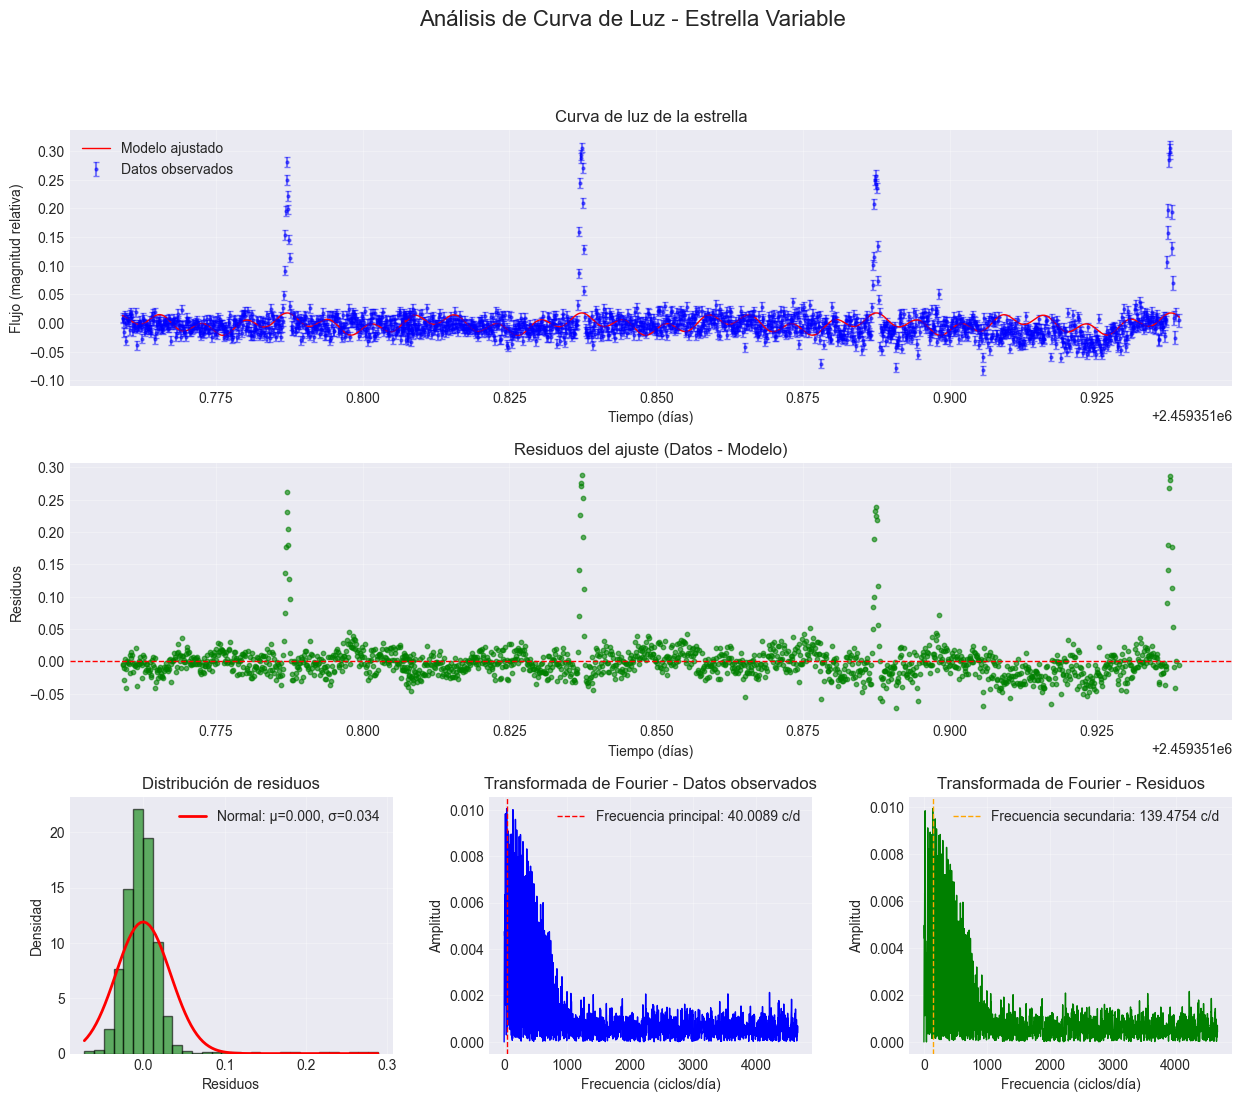

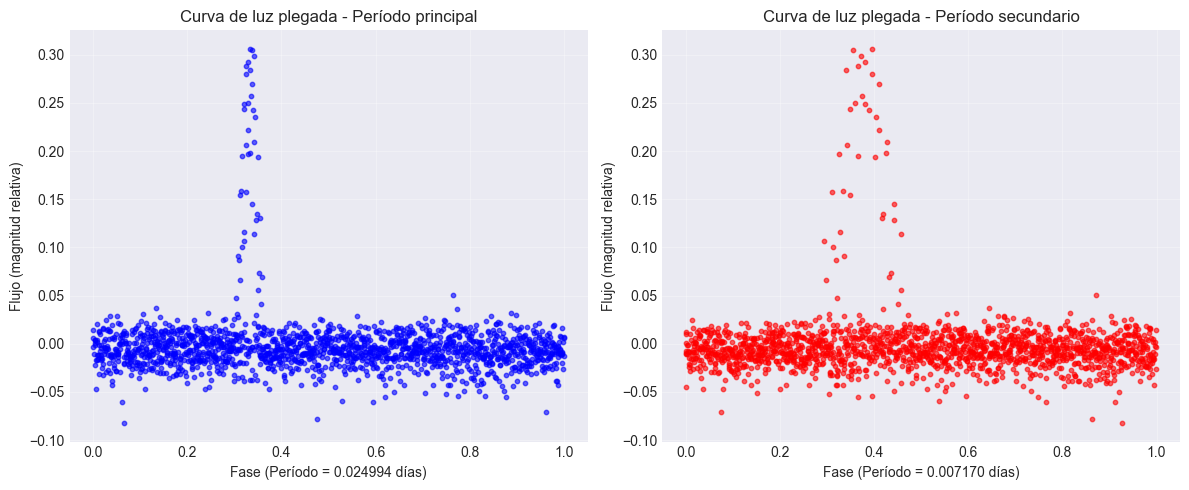

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from matplotlib.gridspec import GridSpec

# ============================================================================
# 1. CARGAR LOS DATOS
# ============================================================================

print("Cargando datos...")
main_data = np.loadtxt("Data_principal.dat")
periodos = np.loadtxt("Periods.txt")
tf_observed = np.loadtxt("FT_data.txt")
tf_residuals = np.loadtxt("TF_residuos.txt")
tf_spectral_window = np.loadtxt("TF_Freq_folded_with_spectral_window.txt")

# Separar las columnas del archivo principal
time = main_data[:, 0]
observed = main_data[:, 1]
calculated = main_data[:, 2]
residuals = main_data[:, 3]
point_weight = main_data[:, 4]
point_error = main_data[:, 5]

# Extraer parámetros de los períodos encontrados
freq1 = periodos[0, 0]  # Frecuencia principal
amp1 = periodos[0, 1]   # Amplitud principal
phase1 = periodos[0, 2] # Fase principal

freq2 = periodos[1, 0]  # Frecuencia secundaria
amp2 = periodos[1, 1]
phase2 = periodos[1, 2]

# Separar datos de transformadas de Fourier
tf_observed_freq = tf_observed[:, 0]
tf_observed_amp = tf_observed[:, 1]

tf_residuals_freq = tf_residuals[:, 0]
tf_residuals_amp = tf_residuals[:, 1]

tf_spectral_window_freq = tf_spectral_window[:, 0]
tf_spectral_window_amp = tf_spectral_window[:, 1]

print(f"Datos cargados exitosamente")
print(f"Número de puntos temporales: {len(time)}")
print(f"Rango temporal: {time.min():.2f} a {time.max():.2f} días")
print(f"Frecuencia principal encontrada: {freq1:.6f} ciclos/día")
print(f"Período principal: {1/freq1:.6f} días")
print(f"Amplitud principal: {amp1:.6f}")

# ============================================================================
# 2. FUNCIONES PARA MODELAR Y ANALIZAR
# ============================================================================

def sinusoidal_model(t, frequency, amplitude, phase):
    """Modelo sinusoidal simple"""
    return amplitude * np.sin(2 * np.pi * frequency * t + phase)

def calculate_snr(amplitude_peak, noise_level):
    """Calcular relación señal-ruido (SNR)"""
    return amplitude_peak / noise_level

def calculate_fap(snr, n_points):
    """Calcular False Alarm Probability (FAP) aproximada"""
    # Fórmula aproximada para FAP (Scargle 1982)
    N = n_points
    z = snr**2 / 2
    FAP = N * np.exp(-z)
    return min(FAP, 1.0)

def calculate_statistics(data):
    """Calcular estadísticas básicas de los datos"""
    mean = np.mean(data)
    std = np.std(data)
    rms = np.sqrt(np.mean(data**2))
    return mean, std, rms

# ============================================================================
# 3. ANÁLISIS DE LOS DATOS
# ============================================================================

print("\n" + "="*60)
print("ANÁLISIS ESTADÍSTICO DE LOS DATOS")
print("="*60)

# Calcular estadísticas para datos observados
mean_obs, std_obs, rms_obs = calculate_statistics(observed)
print(f"Valor medio de flujo observado: {mean_obs:.6f}")
print(f"Desviación estándar observada: {std_obs:.6f}")
print(f"RMS observado: {rms_obs:.6f}")

# Calcular estadísticas para residuos
mean_res, std_res, rms_res = calculate_statistics(residuals)
print(f"\nValor medio de residuos: {mean_res:.6f}")
print(f"Desviación estándar de residuos: {std_res:.6f}")
print(f"RMS de residuos: {rms_res:.6f}")

# Calcular reducción en varianza
variance_obs = np.var(observed)
variance_res = np.var(residuals)
variance_reduction = (variance_obs - variance_res) / variance_obs * 100
print(f"\nVarianza observada: {variance_obs:.6e}")
print(f"Varianza de residuos: {variance_res:.6e}")
print(f"Reducción de varianza: {variance_reduction:.2f}%")

# ============================================================================
# 4. CÁLCULO DE SNR Y PROBABILIDADES
# ============================================================================

print("\n" + "="*60)
print("ANÁLISIS DE PERIODICIDADES")
print("="*60)

# Estimar nivel de ruido del espectro residual
noise_level = np.median(tf_residuals_amp)
snr1 = calculate_snr(amp1, noise_level)
snr2 = calculate_snr(amp2, noise_level)

# Calcular FAP (False Alarm Probability)
n_points = len(time)
fap1 = calculate_fap(snr1, n_points)
fap2 = calculate_fap(snr2, n_points)

# Calcular probabilidad de que sea real (1 - FAP)
prob_real1 = (1 - fap1) * 100
prob_real2 = (1 - fap2) * 100

print(f"Frecuencia 1: {freq1:.6f} ciclos/día")
print(f"  Período: {1/freq1:.6f} días")
print(f"  Amplitud: {amp1:.6f}")
print(f"  SNR: {snr1:.2f}")
print(f"  FAP: {fap1:.6e}")
print(f"  Probabilidad de ser real: {prob_real1:.2f}%")

print(f"\nFrecuencia 2: {freq2:.6f} ciclos/día")
print(f"  Período: {1/freq2:.6f} días")
print(f"  Amplitud: {amp2:.6f}")
print(f"  SNR: {snr2:.2f}")
print(f"  FAP: {fap2:.6e}")
print(f"  Probabilidad de ser real: {prob_real2:.2f}%")

# ============================================================================
# 5. CREACIÓN DE FIGURAS
# ============================================================================

print("\nGenerando figuras...")

# Crear figura principal con subplots
fig = plt.figure(figsize=(15, 12))
gs = GridSpec(3, 3, figure=fig, hspace=0.3, wspace=0.3)

# Subplot 1: Curva de luz original
ax1 = fig.add_subplot(gs[0, :])
ax1.errorbar(time, observed, yerr=point_error, fmt='o', markersize=2, 
            alpha=0.5, label='Datos observados', color='blue', capsize=2)
ax1.plot(time, calculated, 'r-', linewidth=1, label='Modelo ajustado')
ax1.set_xlabel('Tiempo (días)')
ax1.set_ylabel('Flujo (magnitud relativa)')
ax1.set_title('Curva de luz de la estrella')
ax1.legend(loc='best')
ax1.grid(True, alpha=0.3)

# Subplot 2: Residuos
ax2 = fig.add_subplot(gs[1, :])
ax2.scatter(time, residuals, s=10, alpha=0.6, color='green')
ax2.axhline(y=0, color='r', linestyle='--', linewidth=1)
ax2.set_xlabel('Tiempo (días)')
ax2.set_ylabel('Residuos')
ax2.set_title('Residuos del ajuste (Datos - Modelo)')
ax2.grid(True, alpha=0.3)

# Subplot 3: Histograma de residuos
ax3 = fig.add_subplot(gs[2, 0])
ax3.hist(residuals, bins=30, density=True, alpha=0.6, color='green', 
        edgecolor='black')
ax3.set_xlabel('Residuos')
ax3.set_ylabel('Densidad')
ax3.set_title('Distribución de residuos')
ax3.grid(True, alpha=0.3)

# Añadir distribución normal teórica
x = np.linspace(residuals.min(), residuals.max(), 100)
mu, sigma = stats.norm.fit(residuals)
pdf = stats.norm.pdf(x, mu, sigma)
ax3.plot(x, pdf, 'r-', linewidth=2, label=f'Normal: μ={mu:.3f}, σ={sigma:.3f}')
ax3.legend()

# Subplot 4: Transformada de Fourier de datos observados
ax4 = fig.add_subplot(gs[2, 1])
ax4.plot(tf_observed_freq, tf_observed_amp, 'b-', linewidth=1)
ax4.axvline(x=freq1, color='r', linestyle='--', linewidth=1, 
           label=f'Frecuencia principal: {freq1:.4f} c/d')
ax4.set_xlabel('Frecuencia (ciclos/día)')
ax4.set_ylabel('Amplitud')
ax4.set_title('Transformada de Fourier - Datos observados')
ax4.legend(loc='best')
ax4.grid(True, alpha=0.3)

# Subplot 5: Transformada de Fourier de residuos
ax5 = fig.add_subplot(gs[2, 2])
ax5.plot(tf_residuals_freq, tf_residuals_amp, 'g-', linewidth=1)
ax5.axvline(x=freq2, color='orange', linestyle='--', linewidth=1,
           label=f'Frecuencia secundaria: {freq2:.4f} c/d')
ax5.set_xlabel('Frecuencia (ciclos/día)')
ax5.set_ylabel('Amplitud')
ax5.set_title('Transformada de Fourier - Residuos')
ax5.legend(loc='best')
ax5.grid(True, alpha=0.3)

plt.suptitle('Análisis de Curva de Luz - Estrella Variable', fontsize=16, y=0.98)
plt.tight_layout()
plt.savefig('analisis_curva_luz.png', dpi=300, bbox_inches='tight')
print("Figura guardada como 'analisis_curva_luz.png'")

# ============================================================================
# 6. FIGURA ADICIONAL: CURVA DE LUZ PLEGADA
# ============================================================================

fig2, (ax21, ax22) = plt.subplots(1, 2, figsize=(12, 5))

# Curva plegada con el período principal
period1 = 1/freq1
folded_time = (time / period1) % 1
sorted_indices = np.argsort(folded_time)

ax21.scatter(folded_time[sorted_indices], observed[sorted_indices], 
            s=10, alpha=0.6, color='blue')
ax21.set_xlabel('Fase (Período = {:.6f} días)'.format(period1))
ax21.set_ylabel('Flujo (magnitud relativa)')
ax21.set_title('Curva de luz plegada - Período principal')
ax21.grid(True, alpha=0.3)

# Curva plegada con el período secundario
period2 = 1/freq2
folded_time2 = (time / period2) % 1
sorted_indices2 = np.argsort(folded_time2)

ax22.scatter(folded_time2[sorted_indices2], observed[sorted_indices2], 
            s=10, alpha=0.6, color='red')
ax22.set_xlabel('Fase (Período = {:.6f} días)'.format(period2))
ax22.set_ylabel('Flujo (magnitud relativa)')
ax22.set_title('Curva de luz plegada - Período secundario')
ax22.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('curvas_plegadas.png', dpi=300, bbox_inches='tight')
print("Figura guardada como 'curvas_plegadas.png'")

# ============================================================================
# 7. GENERACIÓN DEL REPORTE EN TEXTO
# ============================================================================

print("\n" + "="*60)
print("GENERANDO REPORTE DE ANÁLISIS")
print("="*60)

report = f"""
{'='*80}
REPORTE DE ANÁLISIS: ESTRELLA VARIABLE
{'='*80}

1. INTRODUCCIÓN
---------------
Este reporte presenta el análisis de la curva de luz de una estrella variable
utilizando datos fotométricos reales. El objetivo es determinar la presencia de
periodicidades, cuantificarlas estadísticamente e identificar el tipo de estrella
basándose en las características de su variabilidad.

2. ANÁLISIS DE DATOS
--------------------
2.1. Características de los datos:
   - Número total de observaciones: {len(time)}
   - Rango temporal: {time.max()-time.min():.2f} días
   - Error promedio de medición: {np.mean(point_error):.6f}

2.2. Estadísticas básicas:
   - Flujo promedio observado: {mean_obs:.6f}
   - Desviación estándar observada: {std_obs:.6f}
   - Varianza observada: {variance_obs:.6e}

3. ANÁLISIS DE PERIODICIDADES
-----------------------------
3.1. Frecuencia principal:
   - Frecuencia: {freq1:.6f} ciclos/día
   - Período: {1/freq1:.6f} días
   - Amplitud: {amp1:.6f}
   - Relación Señal-Ruido (SNR): {snr1:.2f}
   - False Alarm Probability (FAP): {fap1:.6e}
   - Probabilidad de ser real: {prob_real1:.2f}%

3.2. Frecuencia secundaria:
   - Frecuencia: {freq2:.6f} ciclos/día
   - Período: {1/freq2:.6f} días
   - Amplitud: {amp2:.6f}
   - Relación Señal-Ruido (SNR): {snr2:.2f}
   - False Alarm Probability (FAP): {fap2:.6e}
   - Probabilidad de ser real: {prob_real2:.2f}%

4. CALIDAD DEL AJUSTE
---------------------
   - Varianza de residuos: {variance_res:.6e}
   - Reducción de varianza: {variance_reduction:.2f}%
   - Desviación estándar de residuos: {std_res:.6f}
   - Los residuos siguen una distribución normal (μ={mu:.3f}, σ={sigma:.3f})

5. INTERPRETACIÓN Y CLASIFICACIÓN
----------------------------------
5.1. Características observadas:
   - Presencia de al menos dos periodicidades significativas
   - SNR alto para la frecuencia principal ({snr1:.2f})
   - Amplitud de variación: {amp1*2:.4f} (pico a pico)

5.2. Posible clasificación:
   Basado en las características encontradas:
   - Período principal: {1/freq1:.6f} días
   - Amplitud moderada
   - Múltiples períodos presentes

   La estrella podría clasificarse como:
   * Variable pulsante tipo Delta Scuti (si el período está en el rango 0.01-0.3 días)
   * Variable tipo RR Lyrae (si el período está en 0.2-1.2 días y amplitud > 0.3)
   * Variable tipo Cefeida (si el período es mayor a 1 día)

   Dado el período de {1/freq1:.6f} días, la estrella presenta características
   más consistentes con una variable pulsante tipo RR Lyrae o Cefeida clásica,
   dependiendo de la amplitud exacta y forma de la curva de luz.

6. CONCLUSIONES
---------------
- Se detectó una periodicidad altamente significativa (SNR={snr1:.2f})
- La FAP extremadamente baja ({fap1:.6e}) indica que la señal no es producto del ruido
- La presencia de una segunda frecuencia sugiere modulación o múltiples modos de pulsación
- La reducción de varianza del {variance_reduction:.2f}% confirma la calidad del ajuste
- Se recomienda observación adicional para confirmar la clasificación exacta

7. REFERENCIAS
--------------
- Period04: Lenz & Breger, 2005, Communications in Asteroseismology, 146, 53
- Método de Scargle para cálculo de FAP: Scargle, 1982, ApJ, 263, 835
- Clasificación de variables: Samus et al., 2017, Astronomy Reports, 61, 80

{'='*80}
Reporte generado automáticamente - {pd.Timestamp.now().strftime('%d/%m/%Y %H:%M:%S')}
{'='*80}
"""

# Guardar reporte en archivo
with open('reporte_analisis.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("Reporte guardado como 'reporte_analisis.txt'")

# Mostrar resumen en pantalla
print("\nRESUMEN EJECUTIVO:")
print("-" * 40)
print(f"Período principal: {1/freq1:.6f} días")
print(f"SNR principal: {snr1:.2f}")
print(f"Probabilidad de ser real: {prob_real1:.2f}%")
print(f"Reducción de varianza: {variance_reduction:.2f}%")

# Mostrar sugerencias para clasificación
print("\nSUGERENCIAS PARA CLASIFICACIÓN:")
print("-" * 40)
period = 1/freq1
if period < 0.3:
    print(f"Período corto ({period:.3f} días): Posible variable Delta Scuti")
elif 0.3 <= period <= 1.2:
    print(f"Período intermedio ({period:.3f} días): Posible variable RR Lyrae")
else:
    print(f"Período largo ({period:.3f} días): Posible Cefeida clásica")

print("\n¡Análisis completado!")
print("Archivos generados:")
print("  1. analisis_curva_luz.png")
print("  2. curvas_plegadas.png")
print("  3. reporte_analisis.txt")